In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
df_cct = pd.read_parquet("/home/onyxia/work/df_all.parquet")

In [3]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [4]:
df_cct = df_cct[['day_nbt/last_30d_av_day_nbt', 'daily_amount', 'Amount',
       'amt/daily_income', 'last_3d_amt/nbt', 'Online Transaction',
       'Credit Limit', 'delta_t_s_card', 'hr_nbt/last_30d_av_hr_nbt',
       'delta_t_s', 'Hours', 'year_diff', 'Day', 'Month','Swipe Transaction','Is Fraud?']]

<Axes: >

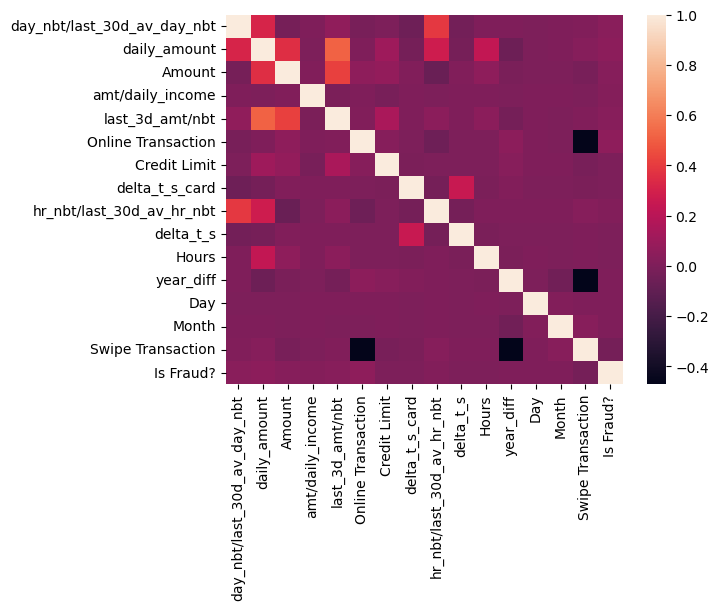

In [5]:
sns.heatmap(df_cct.corr())

In [6]:
# selecting features
features = ['day_nbt/last_30d_av_day_nbt', 'daily_amount', 'Amount',
       'amt/daily_income', 'last_3d_amt/nbt', 'Online Transaction',
       'Credit Limit', 'delta_t_s_card', 'hr_nbt/last_30d_av_hr_nbt',
       'delta_t_s', 'Hours', 'year_diff', 'Day', 'Month','Swipe Transaction']
X = df_cct[features]
y = df_cct["Is Fraud?"]

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

# using Column Transformer for RobustScaler (numerical values) and OneHotEncoder (categorical values)
preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('rbscaler', RobustScaler(), ['day_nbt/last_30d_av_day_nbt', 'daily_amount', 'Amount',
       'amt/daily_income', 'last_3d_amt/nbt',
       'Credit Limit', 'delta_t_s_card', 'hr_nbt/last_30d_av_hr_nbt',
       'delta_t_s', 'Hours', 'year_diff', 'Day', 'Month'])
       ])
X = preprocessor.fit_transform(X)

In [8]:
# splitting train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
rforest = RandomForestClassifier(criterion='gini')
rforest.fit(X_train,y_train)


RandomForestClassifier()

In [15]:
# Apply model to validation data
y_pred = rforest.predict(X_test)

In [16]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   7307089
           1       0.87      0.07      0.13      8981

    accuracy                           1.00   7316070
   macro avg       0.93      0.53      0.56   7316070
weighted avg       1.00      1.00      1.00   7316070



In [17]:
# plot confusion matrix function
import itertools

def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

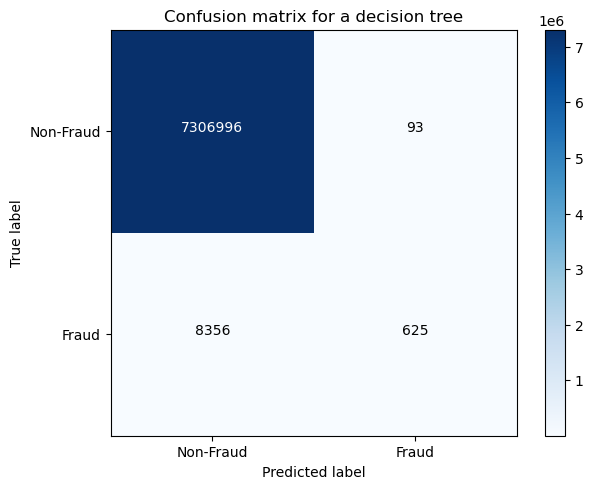

In [18]:

cnf_matrix_dtree = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for a decision tree')
plt.show()